<a href="https://colab.research.google.com/github/rosh4github/eportfolio/blob/main/ML_Unit_6_Dev_project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline





In [ ]:
df = pd.read_csv('/AB_NYC_2019.csv')


In [ ]:
df.head()
df.tail()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
# Calculate the total number of rows with at least one missing value
total_rows_with_missing_values = df.isna().any(axis=1).sum()

# Print the total number of rows with missing values
print(f'Total number of rows with at least one missing value: {total_rows_with_missing_values}')

df.isna().sum()


Total number of rows with at least one missing value: 10074


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From the results, over 10k listings do not have reviews. Will this have a bearing on our ML algorithm if we use last_review and reviews_per_month

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


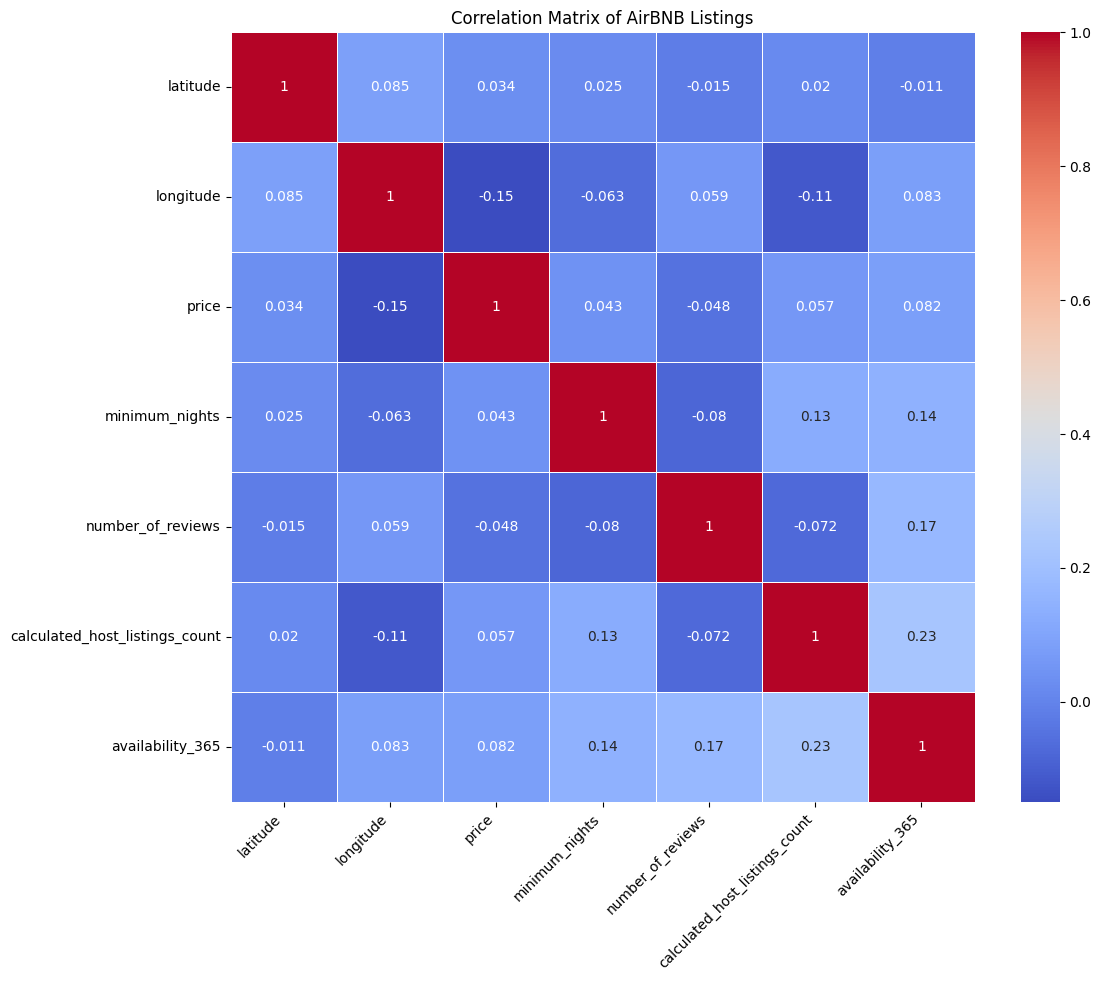

In [ ]:
# Drop the 'id', 'host_id', and 'reviews_per_month' columns
df = df.drop(columns=['id', 'host_id', 'reviews_per_month', 'last_review', 'name'])


# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of AirBNB Listings')
plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.show()


- No Correlation between any of the variables

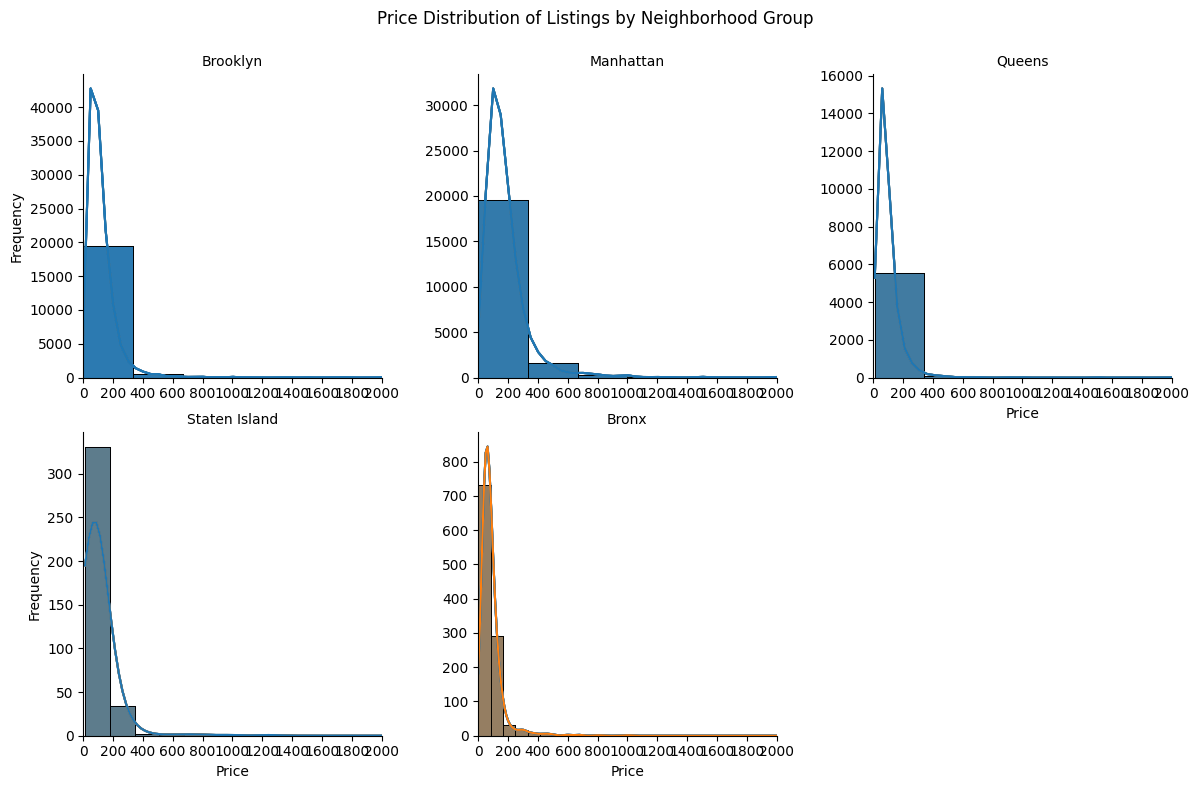

In [ ]:
neighborhood_colors = {
    'Brooklyn': 'dodgerblue',
    'Manhattan': 'darkorange',
    'Queens': 'forestgreen',
    'Staten Island': 'mediumvioletred',
    'Bronx': 'gold'
}

# Create the FacetGrid
g = sns.FacetGrid(df, col="neighbourhood_group", col_wrap=3, height=4, sharex=False, sharey=False)

# Map the histogram plot with custom colors
for neighborhood, color in neighborhood_colors.items():
    g.map_dataframe(sns.histplot, "price", bins=30, kde=True, color=color,
                    hue=df['neighbourhood_group'] == neighborhood)

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Price", "Frequency")

# Adjust the x-axis limits and ticks for better readability
for ax in g.axes.flat:
    ax.set_xlim(0, 2000)  # Set the x-axis limit to a more reasonable range
    ax.set_xticks(range(0, 2001, 200))  # Set the ticks at intervals of 200

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Price Distribution of Listings by Neighborhood Group')

plt.show()


In [ ]:
# Filter listings for Manhattan, Brooklyn, and Queens
filtered_df = df[df['neighbourhood_group'].isin(['Manhattan', 'Brooklyn', 'Queens'])]

# Select relevant columns for summary statistics
columns_of_interest = ['neighbourhood_group', 'availability_365', 'number_of_reviews', 'minimum_nights', 'price', 'longitude', 'latitude']

# Compute mean and standard deviation for each neighborhood group
summary_stats = filtered_df[columns_of_interest].groupby('neighbourhood_group').agg(['mean', 'std']).reset_index()

# Flatten the MultiIndex columns
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

# Rename columns for better readability
summary_stats.rename(columns={
    'neighbourhood_group_': 'Neighborhood Group',
    'availability_365_mean': 'Availability Mean',
    'availability_365_std': 'Availability Std',
    'number_of_reviews_mean': 'Reviews Mean',
    'number_of_reviews_std': 'Reviews Std',
    'minimum_nights_mean': 'Min Nights Mean',
    'minimum_nights_std': 'Min Nights Std',
    'price_mean': 'Price Mean',
    'price_std': 'Price Std',
    'longitude_mean': 'Longitude Mean',
    'longitude_std': 'Longitude Std',
    'latitude_mean': 'Latitude Mean',
    'latitude_std': 'Latitude Std'
}, inplace=True)

# Style the DataFrame with a single color scheme
styled_stats = summary_stats.style.format({
    "Availability Mean": "{:.2f}", "Availability Std": "{:.2f}",
    "Reviews Mean": "{:.2f}", "Reviews Std": "{:.2f}",
    "Min Nights Mean": "{:.2f}", "Min Nights Std": "{:.2f}",
    "Price Mean": "{:.2f}", "Price Std": "{:.2f}",
    "Longitude Mean": "{:.5f}", "Longitude Std": "{:.5f}",
    "Latitude Mean": "{:.5f}", "Latitude Std": "{:.5f}"
}).background_gradient(cmap='Blues', subset=[
    "Availability Mean", "Availability Std", "Reviews Mean", "Reviews Std",
    "Min Nights Mean", "Min Nights Std", "Price Mean", "Price Std",
    "Longitude Mean", "Longitude Std", "Latitude Mean", "Latitude Std"
])

styled_stats

,Neighborhood Group,Availability Mean,Availability Std,Reviews Mean,Reviews Std,Min Nights Mean,Min Nights Std,Price Mean,Price Std,Longitude Mean,Longitude Std,Latitude Mean,Latitude Std
0,Brooklyn,100.23,126.28,24.20,44.34,6.06,17.63,124.38,186.87,-73.95119,0.02548,40.68504,0.02740
1,Manhattan,111.98,132.68,20.99,42.57,8.58,24.05,196.88,291.38,-73.97461,0.02214,40.76506,0.03846
2,Queens,144.45,135.54,27.70,51.96,5.18,15.03,99.52,167.10,-73.87277,0.05699,40.73153,0.04037


Location:

Manhattan's higher prices are likely driven by its central location and proximity to key attractions, business centers, and luxury amenities. The geographical coordinates suggest that high-end listings are located in desirable areas, which command premium prices.

Minimum Nights Requirement:

Higher minimum night requirements in Manhattan suggest that longer-term stays are more common, which could contribute to higher overall prices as hosts cater to guests looking for extended accommodations.

Listing Quality and Amenities:

The high standard deviation in prices for Manhattan indicates a wide range of listing qualities, from high-end apartments to luxury penthouses. The amenities and overall quality of listings likely play a significant role in driving prices up in this area.

Review Dynamics:

The number of reviews does not directly correlate with higher prices, particularly in Manhattan, where listings command high prices regardless of review count. This indicates that reputation and user feedback, while important, are secondary to location and quality in driving high-end prices.
In summary, the primary drivers of high-end Airbnb prices in Manhattan, Brooklyn, and Queens are likely related to location, quality of listings, and minimum stay requirements. Manhattan, in particular, benefits from its central location and the range of luxury offerings, which justify its higher prices.

In [ ]:
# Filter listings for Manhattan, Brooklyn as they have the highest average prices

filtered_df = df[df['neighbourhood_group'].isin(['Manhattan', 'Brooklyn'])]

filtered_df = filtered_df.sort_values(by='price', ascending=False)

# Select the top quartile based on price
top_quartile_threshold = filtered_df['price'].quantile(0.75)
top_quartile_df = filtered_df[filtered_df['price'] >= top_quartile_threshold]

top_quartile_df[columns_of_interest].groupby('neighbourhood_group').agg(['mean', 'std']).reset_index()

top_quartile_df.isna().sum()

top_quartile_df = top_quartile_df.dropna()

# Select relevant columns
columns_of_interest = ['availability_365', 'number_of_reviews', 'minimum_nights', 'price', 'longitude', 'latitude', 'room_type', 'neighbourhood_group']

# Filter the relevant columns
top_quartile_df = top_quartile_df[columns_of_interest]


# Define the preprocessing steps for numerical and categorical data
numerical_features = ['availability_365', 'number_of_reviews', 'minimum_nights', 'price', 'longitude', 'latitude']
categorical_features = ['room_type', 'neighbourhood_group']

In [ ]:
numerical_transformer = StandardScaler()

# One-hot encode categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations
X_preprocessed = preprocessor.fit_transform(top_quartile_df)

X_preprocessed

array([[-0.39299169, -0.48654836,  0.99028614, ...,  0.        ,
         0.        ,  1.        ],
       [-0.99468149, -0.34815242, -0.15259645, ...,  0.        ,
         0.        ,  0.        ],
       [-0.99468149, -0.45886917, -0.15259645, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.99468149, -0.45886917, -0.33545767, ...,  1.        ,
         0.        ,  1.        ],
       [-0.49448154,  0.23311054, -0.24402706, ...,  0.        ,
         0.        ,  0.        ],
       [-0.99468149, -0.29279404, -0.28974237, ...,  0.        ,
         0.        ,  1.        ]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

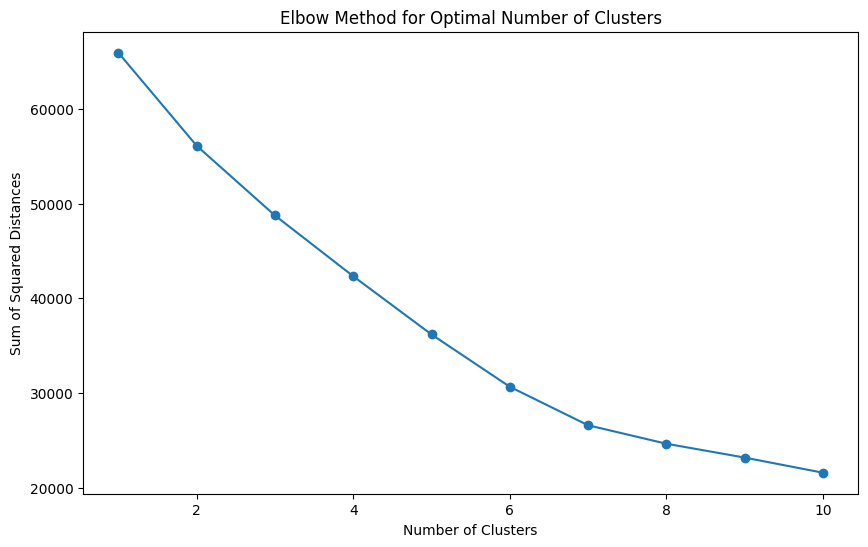

In [ ]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    sse.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [ ]:
# Perform K-means clustering with the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

# Get feature names after transformation
num_features = numerical_features
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = list(num_features) + list(cat_features)

# Create a DataFrame from the preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

X_preprocessed_df
# Add the cluster labels to the original DataFrame
X_preprocessed_df['cluster'] = clusters

# Group by the cluster labels and calculate the mean for each cluster
cluster_summary = X_preprocessed_df.groupby('cluster').mean().reset_index()

# Display the summary table
print(cluster_summary)


# Plot the heatmap with features on the y-axis and clusters on the x-axis
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', center=0)
plt.title('Cluster Summary Heatmap')
plt.xlabel('Features')  # X-axis label for clusters
plt.ylabel('Cluster')  # Y-axis label for features
plt.show()




,availability_365,number_of_reviews,minimum_nights,price,longitude,latitude,room_type_Private room,room_type_Shared room,neighbourhood_group_Manhattan,cluster
0,-0.392992,-0.486548,0.990286,21.876892,-0.435015,0.979915,0.0,0.0,1.0,1
1,-0.994681,-0.348152,-0.152596,21.876892,0.884460,-0.057326,0.0,0.0,0.0,1
2,-0.994681,-0.458869,-0.152596,21.874625,1.714655,1.518084,0.0,0.0,1.0,1
3,1.651304,-0.486548,0.990286,21.874625,-0.390371,-0.393190,0.0,0.0,1.0,1
4,-0.392992,-0.320473,4.144642,21.874625,-0.363765,-0.557186,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
10484,-0.559725,-0.237436,-0.289742,-0.367781,0.756390,-0.088289,0.0,0.0,0.0,2
10485,-0.994681,-0.375832,-0.244027,-0.367781,-0.999602,0.706764,0.0,0.0,1.0,3
10486,-0.994681,-0.458869,-0.335458,-0.367781,-0.275830,0.000400,1.0,0.0,1.0,3
10487,-0.494482,0.233111,-0.244027,-0.367781,1.468889,-0.187998,0.0,0.0,0.0,2
